In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
features = pd.read_csv('/content/features.csv')

In [3]:
features = pd.read_csv('/content/features.csv')
stores = pd.read_csv('/content/stores.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [13]:
train = train.merge(stores, on='Store', how='inner')
test = test.merge(stores, on='Store', how='inner')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [14]:
train.shape

(421570, 7)

In [15]:
features = features.merge(stores, on='Store', how='inner')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [16]:
features.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True, axis=1)

features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [17]:
columns_to_plot = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

means = {}
for col in columns_to_plot:
    means[col] = features.groupby('Date')[col].mean().reset_index()

fig = make_subplots(rows=2, cols=2, subplot_titles=columns_to_plot)

for i, col in enumerate(columns_to_plot):
    row = i // 2 + 1
    col_num = i % 2 + 1
    fig.add_trace(go.Scatter(x=means[col]['Date'], y=means[col][col], mode='lines', name=col),
                  row=row, col=col_num)

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Value')

fig.update_layout(title_text='Average Over Time', showlegend=False)
fig.update_layout(height=800, width=1000, template='plotly_dark')

fig.show()

In [18]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'))


for i, column in enumerate(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']):
    row = i // 2 + 1
    col = i % 2 + 1
    mean_data = features.groupby('Store')[column].mean().reset_index()
    bar_chart = px.bar(mean_data, x='Store', y=column)


    for trace in bar_chart.data:
        fig.add_trace(go.Bar(x=trace.x, y=trace.y, name=trace.name), row=row, col=col)
fig.update_xaxes(title_text='Store')
fig.update_yaxes(title_text='Avg Value')
fig.update_layout(title_text='Avg by Store', showlegend=False)
fig.update_layout(height=800, width=1000, template='plotly_dark')

fig.show()


In [19]:
weekly_sales = train.groupby('Date')['Weekly_Sales'].mean().reset_index()

fig = px.line(weekly_sales, x='Date', y='Weekly_Sales', title='Avg Weekly Sales over Time')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Weekly Sales')

fig.update_layout(height=600, width=1000, template='plotly_dark')

fig.show()

In [20]:
store_mean_weekly_sales = train.groupby('Store')['Weekly_Sales'].mean().reset_index()

fig = px.bar(store_mean_weekly_sales, x='Store', y='Weekly_Sales', title='Average Weekly Sales by Store')

fig.update_xaxes(title_text='Store')
fig.update_yaxes(title_text='Average Weekly Sales')

fig.update_layout(template='plotly_dark')

fig.show()

In [21]:
dept_mean_weekly_sales = train.groupby('Dept')['Weekly_Sales'].mean().reset_index()

fig = px.bar(dept_mean_weekly_sales, x='Dept', y='Weekly_Sales', title='Average Weekly Sales by Dept')

fig.update_xaxes(title_text='Dept')
fig.update_yaxes(title_text='Average Weekly Sales')

fig.update_layout(template='plotly_dark')

fig.show()

In [22]:
def pre_processing(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['DayOfWeek'] = df[date_column].dt.day_name()
    df['Month'] = df[date_column].dt.month
    df['Year'] = df[date_column].dt.year
    df.drop('Date', inplace=True, axis=1)
    df = pd.get_dummies(train, columns=['Store', 'Dept', 'Type', 'DayOfWeek'], drop_first=True)
    df['IsHoliday'].replace({True:1, False:0}, inplace=True)
    return df

In [23]:
df = pre_processing(train, 'Date')
df.head()

,Weekly_Sales,IsHoliday,Size,Month,Year,Store_2,Store_3,Store_4,Store_5,Store_6,...,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,24924.50,0,151315,2,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46039.49,1,151315,2,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41595.55,0,151315,2,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19403.54,0,151315,2,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21827.90,0,151315,3,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
target_column = 'Weekly_Sales'

X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (379413, 130)
X_test shape: (42157, 130)
y_train shape: (379413,)
y_test shape: (42157,)


In [ ]:

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)


random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances)

XG BOOST

Mean Absolute Error: 3724.96


<Figure size 1000x600 with 0 Axes>

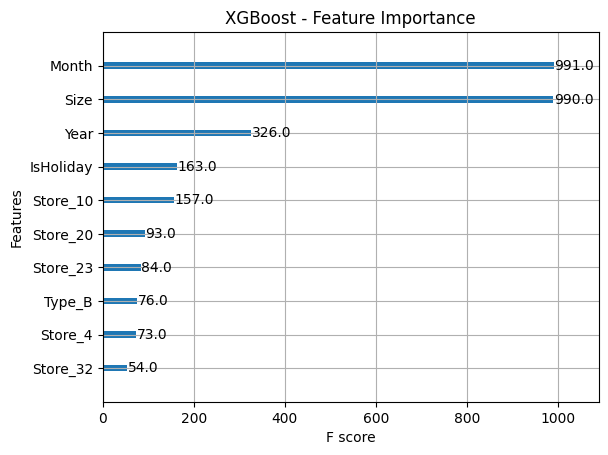

In [27]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


mae = np.mean(np.abs(y_pred - y_test))
print(f"Mean Absolute Error: {mae:.2f}")
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("XGBoost - Feature Importance")
plt.show()




Elastic Net Regression(MIX OF LASSO AND RIDGE REGRESSION)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
alpha = 0.5
l1_ratio = 0.5
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)


elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 455432894.65528244


LIGHT GBM

In [30]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=Y_train)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
num_round = 100
bst = lgb.train(params, train_data, num_round)
Y_pred = bst.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 128
[LightGBM] [Info] Start training from score 15979.221909
RMSE: 9036.38890136795
R^2: 0.8434115694026583


ADA BOOST


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.97


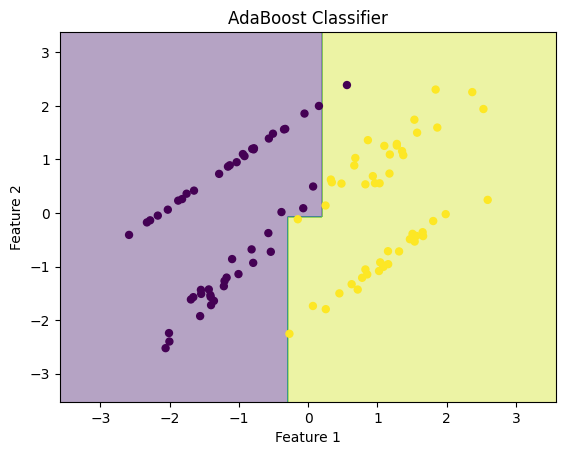

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
ada_boost_model.fit(X_train, y_train)
y_pred = ada_boost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = ada_boost_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("AdaBoost Classifier")
plt.show()
